Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


30/30 [==============================] - 2s 58ms/step - loss: 0.6559 - accuracy: 0.6133 - val_loss: 0.7384 - val_accuracy: 0.5400
Epoch 2/50
30/30 [==============================] - 2s 51ms/step - loss: 0.4613 - accuracy: 0.7733 - val_loss: 0.5936 - val_accuracy: 0.6800
Epoch 3/50
30/30 [==============================] - 2s 60ms/step - loss: 0.3803 - accuracy: 0.8533 - val_loss: 0.3357 - val_accuracy: 0.8600
Epoch 4/50
30/30 [==============================] - 2s 50ms/step - loss: 0.2960 - accuracy: 0.8933 - val_loss: 0.2886 - val_accuracy: 0.8800
Epoch 5/50
30/30 [==============================] - 2s 52ms/step - loss: 0.2766 - accuracy: 0.9133 - val_loss: 0.2435 - val_accuracy: 0.9200
Epoch 6/50
30/30 [==============================] - 2s 50ms/step - loss: 0.2734 - accuracy: 0.9000 - val_loss: 0.1911 - val_accuracy: 0.9600
Epoch 7/50
30/30 [==============================] - 2s 50ms/step - loss: 0.2369 - accuracy: 0.9133 - val_loss: 0.2209 - val_accuracy: 0.9200
Epoch 8/50
30/30 [======

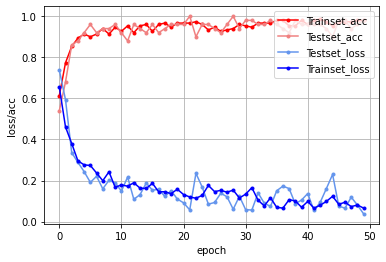

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19

np.random.seed(3)
tf.compat.v1.set_random_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,    # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range=0.1,   # 전체 크기의 10% 범위에서 좌우로 이동
                                   height_shift_range=0.1,  # 마찬가지로 위아래로 이동
                                                            # rotaion_range=5,
                                                            # shear_range=0.7,
                                                            # zoom_range=[0.9, 2.2],
                                                            # vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    './train',  # 학습셋이 있는 폴더 위치
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './test', # 테스트셋이 있는 폴더 위치
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

transfer_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

# 모델 컴파일
finetune_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 모델 실행
history = finetune_model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=50,
    validation_data=test_generator,
    validation_steps=10)

# 결과를 그래프로 표현하는 부분
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()